In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../data/train.csv", index_col="PassengerId")
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [1]:
import util
filename = "../data/train.csv"
train, valid, test = util.load_data(filename)
train.head(3)

(889, 16)
(889, 43)


,SibSp,Parch,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,AgeGroup_Infant,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
388,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
260,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
772,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [2]:
byPclass = train.groupby('Pclass')

firstClass = byPclass.get_group(1)
secondClass = byPclass.get_group(2)
thirdClass = byPclass.get_group(3)

def get_survived_filter(df):
    return (df['Survived'] == 1)

data = {}
filt = get_survived_filter(thirdClass)
thirdClass[filt]['Sex'].value_counts()

byPclass

#byPclass['Survived'].hist()

In [3]:
byPclass['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [45]:
def build_percentages(s, d):
    percentages = []
    for i in range(len(s)):
        total = s[i] + d[i]
        p1 = "{:.2%}".format(s[i] / total)
        p2 = "{:.2%}".format(d[i] / total)
        percentages.extend([p1, p2])
    return percentages

def add_text_to_bars(bar1, bar2, values):
    idx = 0
    for rect in bar1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, values[idx], ha='center', va='bottom')
        idx += 2

    idx = 1
    for rect in bar2:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, values[idx], ha='center', va='bottom')
        idx += 2

def add_text_to_bar(bar1, values):
    idx = 0
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, values[idx], ha='center', va='bottom')
        idx += 1

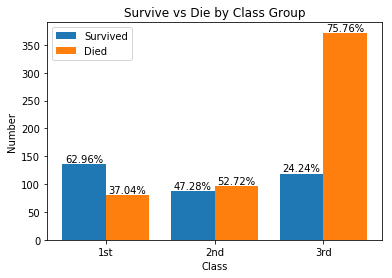

In [28]:
labels = ["1st", "2nd", "3rd"]
survived = [136, 87, 119]
died = [80, 97, 372]

X_axis = np.arange(len(survived))
bar1 = plt.bar(X_axis-0.2, survived, 0.4, label = 'Survived')
bar2 = plt.bar(X_axis+0.2, died, 0.4, label = 'Died')

# Add counts above the two bar graphs
add_text_to_bars(bar1, bar2, build_percentages(survived, died))

plt.xticks(X_axis, labels)
plt.xlabel("Class")
plt.ylabel("Number")
plt.title("Survive vs Die by Class Group")
plt.legend()
plt.savefig("../img/survive_vs_die_by_class_group.png")

In [72]:
byEmbark = train.groupby('Embarked')
byEmbark['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

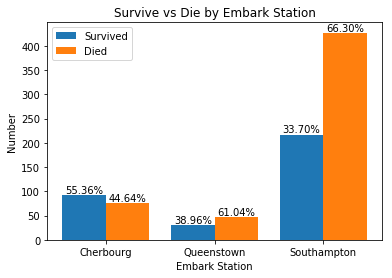

In [29]:
labels = ["Cherbourg", "Queenstown", "Southampton"]
survived = [93, 30, 217]
died = [75, 47, 427]

X_axis = np.arange(len(survived))
bar1 = plt.bar(X_axis-0.2, survived, 0.4, label = 'Survived')
bar2 = plt.bar(X_axis+0.2, died, 0.4, label = 'Died')

# Add counts above the two bar graphs
add_text_to_bars(bar1, bar2, build_percentages(survived, died))

plt.xticks(X_axis, labels)
plt.xlabel("Embark Station")
plt.ylabel("Number")
plt.title("Survive vs Die by Embark Station")
plt.legend()
plt.savefig("../img/survive_vs_die_by_embark_group.png")

<class 'list'>
<class 'dict_values'>


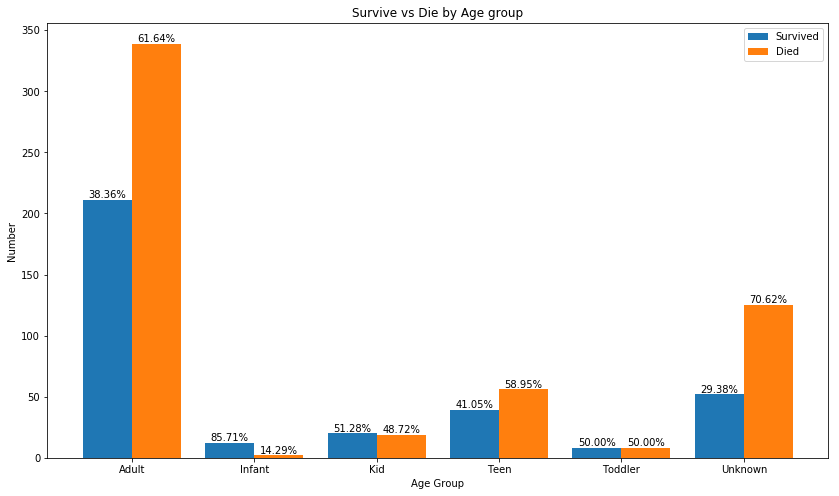

In [63]:
bins= [0,2,4,13,20,110]
labels = ['Infant','Toddler','Kid','Teen','Adult']

age_groups = pd.cut(train['Age'], bins=bins, labels=labels, right=False, retbins=True)[0]
train['AgeGroup'] = age_groups
train['AgeGroup'].replace(np.nan, 'Unknown', inplace=True)

groupByAge = train.groupby('AgeGroup')
survival = groupByAge['Survived'].value_counts()
survivedData = {}
diedData = {}
for l, v in survival.items():
    if l[1] == 0:
        diedData[l[0]] = v
    else:
        survivedData[l[0]] = v


X_axis = np.arange(len(survivedData))
fig = plt.figure(figsize = (14, 8))
bar1 = plt.bar(X_axis-0.2, survivedData.values(), 0.4, label = 'Survived')
bar2 = plt.bar(X_axis+0.2, diedData.values(), 0.4, label = 'Died')

# Add counts above the two bar graphs
values = build_percentages(list(survivedData.values()), list(diedData.values()))
add_text_to_bars(bar1, bar2, values)

plt.xticks(X_axis, survivedData.keys())
plt.xlabel("Age Group")
plt.ylabel("Number")
plt.title("Survive vs Die by Age group")
plt.legend()
plt.savefig("../img/survive_vs_dead_by_age_greoup.png", dpi=300)

In [85]:
cherbourg = byEmbark.get_group('C')

filt = (cherbourg['Sex'] == "male") & (cherbourg['Survived'] == 1)
cherbourg['Sex'].value_counts()

male      95
female    73
Name: Sex, dtype: int64

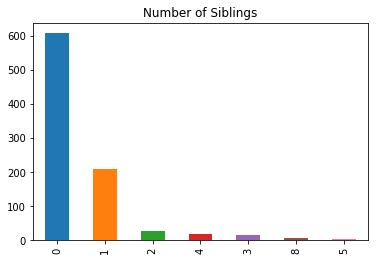

In [97]:
train['SibSp'].value_counts().plot(kind="bar", title="Number of Siblings")
plt.savefig("../img/number_of_siblings.png")

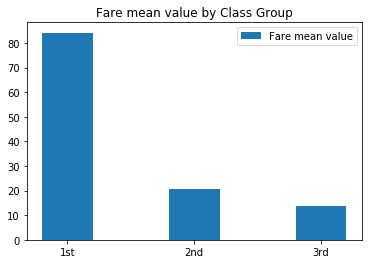

In [116]:
labels = ["1st", "2nd", "3rd"]
values = []
values.append(firstClass['Fare'].mean())
values.append(secondClass['Fare'].mean())
values.append(thirdClass['Fare'].mean())

plt.bar(labels, values, 0.4, label = 'Fare mean value')
plt.legend()
plt.title("Fare mean value by Class Group")
plt.savefig("../img/fare_mean_value_by_class_group.png")